<div class="alert alert-info"><b>Import Libraries<b>

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
%run utils.ipynb

<div class="alert alert-info"><b>Connect to Drive<b>

Uncomment if using Google Colab

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')
# os.chdir(config.PATH)

<div class="alert alert-info"><b>Load data<b>

In [5]:
X, y = load_data()

<div class="alert alert-info"><b>Split data<b>

In [7]:
### Split the data to train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.10, 
                                                    random_state = 42)

In [9]:
print("train set:\n",(X_train.shape, y_train.shape))
print("validation set:\n",(X_val.shape, y_val.shape))
print("test set:\n",(X_test.shape, y_test.shape))

train set:
 ((9340, 224, 224, 3), (9340, 10))
validation set:
 ((1038, 224, 224, 3), (1038, 10))
test set:
 ((2595, 224, 224, 3), (2595, 10))


<div class="alert alert-info"><b>Load the model<b>

In [3]:
model = load_model('vgg_model.h5')
model.summary()

<div class="alert alert-info"><b>Train the model<b>

In [10]:
earlystop = EarlyStopping(monitor = "val_loss", patience = 3, mode = 'auto')

In [11]:
history = model.fit(X_train, y_train,
                    epochs = 100,
                    batch_size = 32,
                    validation_data = (X_val, y_val),
                    callbacks = [earlystop])

Epoch 1/100
292/292 [==============================] - 38s 129ms/step - loss: 0.1122 - accuracy: 0.7198 - val_loss: 0.3701 - val_accuracy: 0.6686
Epoch 2/100
292/292 [==============================] - 36s 124ms/step - loss: 0.1033 - accuracy: 0.7333 - val_loss: 0.3673 - val_accuracy: 0.6455
Epoch 3/100
292/292 [==============================] - 37s 126ms/step - loss: 0.0999 - accuracy: 0.7422 - val_loss: 0.3565 - val_accuracy: 0.6378
Epoch 4/100
292/292 [==============================] - 38s 129ms/step - loss: 0.0954 - accuracy: 0.7363 - val_loss: 0.4120 - val_accuracy: 0.6455
Epoch 5/100
292/292 [==============================] - 38s 128ms/step - loss: 0.0914 - accuracy: 0.7301 - val_loss: 0.3747 - val_accuracy: 0.6329
Epoch 6/100
292/292 [==============================] - 38s 129ms/step - loss: 0.0850 - accuracy: 0.7483 - val_loss: 0.4142 - val_accuracy: 0.6368
Epoch 00006: early stopping


In [12]:
# save model and architecture to single file
model.save("vgg_model.h5")
print("Saved model to disk")

Saved model to disk


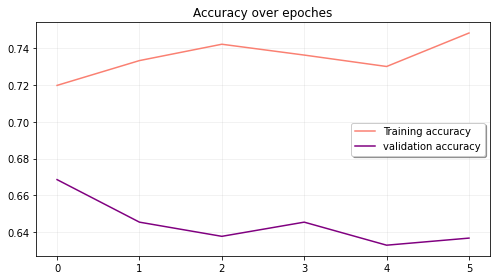

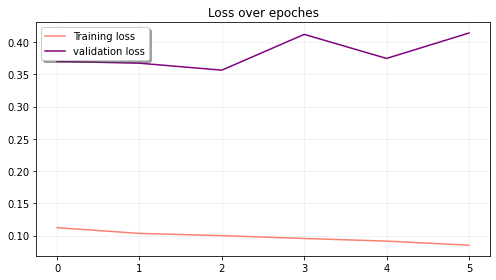

In [14]:
# Plot loss and accuracy over epoches
plot_over_epoches(history)

<div class="alert alert-info"><b>Prediction examples<b>

In [16]:
col_dict = dict(zip(np.arange(10), y.columns))

{0: 'keyword_animal',
 1: 'keyword_human',
 2: 'keyword_mountain',
 3: 'keyword_nature',
 4: 'keyword_outdoors',
 5: 'keyword_person',
 6: 'keyword_plant',
 7: 'keyword_sea',
 8: 'keyword_tree',
 9: 'keyword_water'}

In [15]:
# Predict
y_pred = model.predict(X_test)

In [18]:
# Show some results
for row in range(10):
    pic(X_test[row], y_pred[row], col_dict)

Output hidden; open in https://colab.research.google.com to view.